In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import os

In [13]:
data_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()

validation_datagen = ImageDataGenerator(
    validation_split=0.5
)
#DATA:
train_set = train_datagen.flow_from_directory(
          train_dir,
          target_size=(256,256),
          batch_size=32,
          seed=101, 
          shuffle=True,
          class_mode='categorical',
          )

test_set = validation_datagen.flow_from_directory(
          valid_dir,
          target_size=(256,256),
          batch_size=32,
          shuffle=False,
          # seed=101,
          class_mode='categorical',
          subset = "training")

validation_set = validation_datagen.flow_from_directory(
          valid_dir,
          target_size=(256,256),
          batch_size=32,
          shuffle=True,
          # seed=101,
          class_mode='categorical',
          subset = "validation")

Found 70295 images belonging to 38 classes.
Found 8795 images belonging to 38 classes.
Found 8777 images belonging to 38 classes.


In [15]:
diseases = os.listdir(train_dir)
print(diseases)
print("Total disease classes are: {}".format(len(diseases)))

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [16]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1
print(f"Unique Plants are: \n{plants}")
print("Number of plants: {}".format(len(plants)))
print("Number of diseases: {}".format(NumberOfDiseases))

Unique Plants are: 
['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry']
Number of plants: 14
Number of diseases: 26


In [17]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Tomato___Late_blight,1851
Tomato___healthy,1926
Grape___healthy,1692
Orange___Haunglongbing_(Citrus_greening),2010
Soybean___healthy,2022
Squash___Powdery_mildew,1736
Potato___healthy,1824
Corn_(maize)___Northern_Leaf_Blight,1908
Tomato___Early_blight,1920
Tomato___Septoria_leaf_spot,1745


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [19]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(4096, activation='relu'))
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(38, activation='softmax'))

In [20]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 2048)              0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 4096)              8392704   
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 1024)              4195328   
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 1024)              0         
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 512)               524800    
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 256)              

In [21]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = resnet_model.fit(
            train_set,
            validation_data = validation_set,
            batch_size = 128,
            epochs = 50,
            callbacks=[callback]
            )

Epoch 1/50
2197/2197 [==============================] - 735s 329ms/step - loss: 0.4843 - accuracy: 0.8580 - val_loss: 0.2280 - val_accuracy: 0.9344
Epoch 2/50
2197/2197 [==============================] - 352s 160ms/step - loss: 0.1839 - accuracy: 0.9497 - val_loss: 0.1415 - val_accuracy: 0.9600
Epoch 3/50
2197/2197 [==============================] - 353s 160ms/step - loss: 0.1364 - accuracy: 0.9637 - val_loss: 0.1265 - val_accuracy: 0.9659
Epoch 4/50
2197/2197 [==============================] - 357s 163ms/step - loss: 0.1174 - accuracy: 0.9701 - val_loss: 0.1282 - val_accuracy: 0.9658
Epoch 5/50
2197/2197 [==============================] - 359s 163ms/step - loss: 0.1051 - accuracy: 0.9746 - val_loss: 0.1525 - val_accuracy: 0.9675
Epoch 6/50
2197/2197 [==============================] - 355s 161ms/step - loss: 0.0947 - accuracy: 0.9780 - val_loss: 0.0966 - val_accuracy: 0.9748
Epoch 7/50
2197/2197 [==============================] - 355s 161ms/step - loss: 0.0857 - accuracy: 0.9803 - val_

In [23]:
score = resnet_model.evaluate(test_set, verbose=0)
score

[0.10997728258371353, 0.9785104990005493]

In [24]:
from sklearn.metrics import classification_report
Y_pred = resnet_model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(test_set.classes, y_pred, target_names=list(train_set.class_indices.keys())))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.98      0.97       252
                                 Apple___Black_rot       0.99      1.00      0.99       249
                          Apple___Cedar_apple_rust       0.98      1.00      0.99       220
                                   Apple___healthy       1.00      0.97      0.98       251
                               Blueberry___healthy       1.00      1.00      1.00       227
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       211
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       228
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.96      0.94       205
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       239
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.92      0.

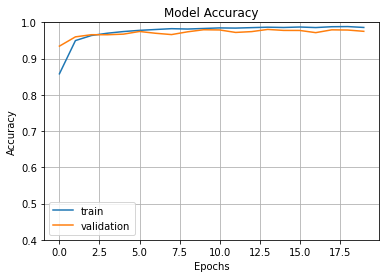

In [25]:
# Evaluating the model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

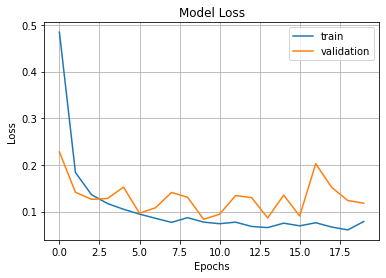

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()